# tp-proteomics
## Contexte Biologique
Vous allez utiliser des outils informatiques qui vous permettront d’analyser des données brutes issues d’une analyse Shotgun Proteomics récemment publiée dans le journal Science sous le titre "Real-time visualization of drug resistance acquisition by horizontal gene transfer reveals a new role for AcrAB-TolC multidrug efflux pump".

Les données associées à cette publication sont publiques et accessibles sur la plateforme [PRIDE](https://www.ebi.ac.uk/pride/archive/projects/PXD011286). Le PDF de la publication est [`data/Nolivos_2019.pdf`](data/Nolivos_2019.pdf).

## Mise en place

### Méthodologie

Vous forkerez le présent "repository" pour vous permettre de sauvegarder votre travail.
Vous éditerez ce fichier `README.md` pour répondre aux questions dans les encarts prévus à cet effet et inserer les figures que vous aurez générées. Ce "repository" vous appartenant, vous pouvez créer tous les repertoires et fichiers necessaires à la conduite du TP.

## I ) Recherche et identification de protéines (peptides) à partir d’expériences de Shotgun Proteomics

L’objectif principal de cette partie est de vous familiariser avec le pipeline d’analyse de données en shotgun proteomics (approche bottum-up) que nous avons vu en cours. 

### Ressources

Outils à récupérer sur la plateforme pédagogique :
- proteowizard: http://proteowizard.sourceforge.net/ (windows uniquement)
- searchgui: http://compomics.github.io/projects/searchgui.html (version windows, version mac + linux)
- peptide shaker: http://compomics.github.io/projects/peptide-shaker.html (toutes les plateformes)

Dans un dossier où vous conserverez toutes les données de ce TP, vous aurez placé au préalable les fichiers suivants :
- données brutes du QEXactive (extension .raw)
- fichiers convertis des données MS (extension .mgf)

### Observations

Cette partie du TP est découpée en 4 grandes parties avec pour chacune des parties, le cheminement à suivre qui n’est pas exhaustif, c’est-à-dire que vous pouvez de vous-même aller explorer les différentes options proposées par les logiciels (en particulier PeptideShaker). A l’issue du TP, vous completerez le fichier markdown avec vos réponses aux différentes questions qui vous seront posées.

### Création de la base de données des protéines

#### Questions: 

##### En quoi consiste l’approche Shotgun proteomics?

Une approche de la stratégie "bottom-up", procédant à la digestion en peptides de complexes protéiques, puis la séparation des peptides par chromatographie liquide et spectrométrie de masse.

##### Quel est l’objectif de cette approche ?

Identifier les protéines dans des mixtures complexes.

#### Procédure
-	Rechercher la base de données des protéines d’E. coli sur [UNIPROT](https://www.uniprot.org/)
-	Télécharger toutes les séquences FASTA des protéines Swiss-prot. : format canonical, uncompressed (onglet download).
-	Sauvegarder le fichier FASTA
-	Télécharger le fichier FASTA correspondant à la protéine suivante : « P00761 ».
-	Copier le fichier FASTA de la protéine P00761 à la suite du fichier FASTA du protéome bactérien.
-	NB : le fichier FASTA s’ouvre avec un éditeur de texte. 

#### Questions

##### L’identification des protéines/ peptides se réalise grâce à une base de données de protéines. Quelle comparaison va être effectuée?

On va comparer le spectre de masse sur charge des peptides étudiés à ceux de la base de données en cherchant ceux ayant une écart de masse inférieur au seuil fixé. On vérifiera aussi qu'au moins six peptides sont retrouvés dans les deux protéines comparées, la couverture de séquence, et la répartition des peptides identifiés sur la séquence de la protéine.

##### Existe t’il d’autres types de bases de données pour réaliser l’identification des peptides trypsiques dans un spectre?

Oui, des bases de données spectrales, où on trouve aussi les spectres, et pas uniquement les protéines.

##### Est-ce qu’il est possible d’identifier des peptides sans base de données?

Oui, avec des librairies spectrales, par homologie.

Il est possible d'attribuer des spectres à des peptides que l'on sait être présents dans un échantillon, mais une approche shot gun ne suffit pas à identifier des peptides. Il faut pour cela utiliser d'autres outils, tels que ceux de bio-informatiques structurale.
(pas sûre de ma réponse)

##### Combien de protéines sont identifiées dans le protéome bactérien?

4 391 protéines E.coli K12 Uniprot 

##### Comment la liste des séquences des protéines est-elle établie ? Est-elle complète? 

Annotées manuellement ou in silico (automatiquement par l'ordinateur), et elles sont incomplètes.

##### Quelle est la différence entre des séquences Swiss-prot et TremBL?

Les séquences de Swiss-prot sont annotées, fiables en générale, alors que celles de Trembl ont une notation automatique : non annotées in silico. On a beaucoup de séquences Trembl.

##### A quoi correspond la protéine P00761 et quelle est sa fonction ? 

C'est la tripsine, qui nous permet de faire la digestion des protéines en hydrolisant les liaisons peptidiques des lysines et des arginines.

##### Pourquoi doit-on rajouter cette protéine dans le fichier FASTA final du protéome bactérien?

Parce qu'on veut s'affranchir de fausses identifications -> on lui dit direct que c'est de la tripsine, certains pics y étant associés.


### Création de la « peak list »

De nombreux petits logiciels existent pour convertir vos fichiers bruts dans un format lisible par les moteurs de recherche. Il existe de nombreux formats de fichiers (diversité des appareillages, équipementiers etc..) qui ne peuvent pas être exploités directement. Vous trouverez en Open access de nombreux convertisseurs de fichiers MSConvert (Proteowizard), PAVA etc… Ici vous allez utiliser MSconvert (plateforme pédagogique).

1. Cliquer sur MSConvertGUI.exe
2. l’interface graphique MSConvert va s’afficher : 
![](assets/MSConvert_screen.png "MS convert screencast")
3. charger le fichier .raw (en haut à gauche, File-browse-add)
4. charger un fichier de destination (TP MADP)
5. output format : sélectionner mgf et laisser les autres paramètres par défaut
6. dans la section filters, sélectionner peak picking, Algorithme vendor –cliquer sur add
7. cliquer sur start
8. les fichiers.raw doivent être convertis en .mgf



#### Question

##### Les données de QExactive ont été enregistrées en mode centroïde et non pas en mode Profiling. D’après vous quelle est la différence entre les deux modes?

C'est le nombre de pics qu'on va faire apparaître : plus de détections avec profiling, qui va différencier les peptides des bruits. Fait plusieurs fois l'aquisition de données, et permet d'avoir un plus large spectre des possibles, notamment des isotopes.
Centroïde : un unique pic, celui de l'intensité maximale, on ne voit pas les isotopes -> réduit la taille du fichier de sortie.

Un spectre MS peut enregistrer des données en mode centroïde ou en mode profile. Le type profile est plus riche car constitué d'une série de données pour montrer le pic du spectre de masse, alors que le type centroïde est plus petit et ne montre que le centre pondéré du pic de masse et une unique valeur d'intensité.

(A mass spectrometer can record spectrum in either profile or centroid data type. A spectra signal is shown as a peak with several scans over time in the profile type, while it is shown as a sharp stick of specific m/z in the centroid mode. The profile data is richer since there are a series of data points (each with its own intensity) to show the mass spectra peak, and the centroid data is smaller in size since only the weighted center of the mass peak and the single intensity value are shown. Centroiding is the process where profile data is converted into centroid data.)


### Identification des peptides par approche PSM Peptide to Spectrum Matching

1. Cliquer sur SearchGUI-3.3.20.jar
NB : si vous avez des messages d’erreur qui s’affichent (missing precursor charges) à un moment donné du process – mettez NO 
2. charger le fichier .mgf (spectrum file)
3. charger un fichier de destination (TP MADP)
4. dans l’onglet search settings, vous allez définir vos paramètres de recherche (cf. Material & Methods de l’article): add
5. donner un nom à vos paramètres de recherche et cliquer sur Spectrum matching
6. Charger votre fichier .FASTA 
7. Ajouter les modifications fixes et variables 
8. Rentrer les paramètres suivants : enzyme, missed cleavage, fragments, tolerance (comme illustré) 
9. Cliquer sur OK et enregistrer votre recherche 
10. Dans la page de dialogue SearchGUI, sélectionner les deux moteurs de recherche X.tandem et OMSSA. 
11. Cliquer sur START 
12. Une page de dialogue va s’afficher, montrant l’avancée de la recherche. 
13. Dans votre fichier d’enregistrement de vos données, vous allez obtenir un fichier de sortie qui est nommé searchgui_out.zip. Il contient le fichier d’analyse OMSSA (.omx) et X ! Tandem (.xml)

#### Questions 
##### Pourquoi est-il important de bien choisir sa base de données?

Plus la base de données est grande, plus il va y avoir de matchs possibles, mais plus il va y avoir de faux positifs. Dans Swiss-prot, on aura des anotations souvent plus fiables.

##### Est-ce que l’on retrouvera toujours les mêmes protéines au cours du temps ?

Non, puisque les bases de données évoluent.

##### Comment la taille de la base de données peut affecter le score de la protéine recherchée?

Plus la base de données est grande, moins bon est le score (formule avec -log(10))..

##### Est-ce que les modifications ajoutées sont les seules modifications que l’on peut attendre dans une expérience de shotgun proteomics?

On connait le design que nous-mêmes avons donné à nos protéines, mais on ne sait pas exactement quelles étaient ses interactions pendant sa culture. Peut-être un sucre y a-t-il été ajouté par exemple. On ne connait pas les modifications post traductionnelles de la protéine.

##### Vous avez choisi la trypsine comme enzyme et choisi « specific », qu’est-ce que cela signifie, et comment cela peut affecter le processing ? 

Digestion théorique très spécifique : coupe seulement après K et R (Arginine et Lysine).

##### Qu’est-ce qu’un missed cleavage ? pourquoi 2 et pas 0 ?

Il arrive que la trypsine (même si c'est très rare) ne coupe pas après un K ou un R. La digestion n'est jamais parfaite, autant mettre qu'il y a 2 erreurs. On aura alors un peptide au lieu de 2.

##### Qu’est-ce que la tolérance en masse, comment la calcule-t-on ?

L'écart maximal toléré entre le rapport masse/charge de la protéine étudié et celui de celle du match. En Da ou ppm, dépend de la résolution de l'appareil ou de la calibration.

### Visualisation des PSM, peptides - protéines

Après avoir l’interrogation des données avec les moteurs de recherche, nous allons utiliser PeptideShaker pour identifier les peptides et protéines. Cliquer sur le fichier PeptideShaker-1.16.45.jar dans le dossier PeptideShaker-1.16.45. 
Une page de dialogue va s’ouvrir et cliquer sur New project.

Project details : 
- Donner un nom au projet
- Donner un nom à l’échantillons 
Input files : 
- Charger le fichier searchgui que vous avez généré 
- Charger le fichier .mgf 
- Charge la base de données FASTA

Enregistrer votre projet sous le nom que vous souhaitez (l’extension du fichier sera .cpsx)


## II ) Analyse Bioinformatique



### Ressources

Seul le langage Python (v3.X) est requis pour ce travail.
Il vous est conseillé d'installer un environnement virtuel python pour installer les libraries requises independamment de votre systèmes d'exploitation.

* Le systême de gestion de paquets [Conda](https://docs.conda.io/en/latest/) est très pratique et disponible pour la plupat des systèmes d'exploitation. Une version légère suffisante pour nos besoin est téléchargeable [ici](https://docs.conda.io/en/latest/miniconda.html)
* Si vous disposez d'un interpreteur python 3.X installé sur votre systême [virtualenv](https://docs.python.org/3/library/venv.html) est désormais "built-in".

#### Procédure conda

Depuis le repertoire de votre repository Git, installez le package scipy et lancez jupyter.

```sh
$PATH_TO_CONDA_DIR/bin/conda install -c conda-forge scipy notebook
$PATH_TO_CONDA_DIR/bin/jupyter notebook
```

Jupyter est une environnement de type notebook permettant l'execution de code python dans des cellules avec une persitance des variables entre chaque evaluation de cellule. Jupyter fournit nativement le support de la librarie graphique matplotlib.

#### Procédure virtualenv

N/A

#### Test de l'installation

Dans l'interface de jupyter, créez un nouveau fichier notebook (*.ipynb) localisé dans votre repertoire git.
Dans la première cellule copiez le code suivant:

```python
%matplotlib nbagg
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
```

La première ligne sert à activer le rendu graphique, pour tout le fichier notebook. Pour **dessiner des graphiques**, il vous est conseillé de suivre la méthode illustrée par le code suivant que vous pouvez executer dans une deuxième cellule notebook.

```python
fig, ax = plt.subplots()
x = np.linspace(norm.ppf(0.01),
                norm.ppf(0.99), 100)

ax.plot(x, norm.pdf(x),
       'r-', lw=5, alpha=0.6)

ax.plot(x, np.full(len(x), 0.2),
       'b-', lw=1)

fig.show()
```

* Creation des objets `fig`et `ax`
* Ajout successif de graphiques sur la même figure par l'appel à des methodes de l'objet `ax`
* Affichage de la figure complète via `fig.show()`
* Evaluation de la cellule pour visualisation dans la cellule de résultats.

L'affichage dans la cellule de rendu du notebook devrait confirmer la bonne installation des dépendances.

#### On entend par figure un graphique avec des **axes légendés et un titre**.

La documentation matplotlib est bien faite, mais **attention** il vous est demandé, pour la construction des graphiques, **d'ignorer les méthodes de l'objet `plt`** (frequemment proposées sur le net) et d'utiliser uniquement les méthodes de l'[objet Axes](https://matplotlib.org/api/axes_api.html?highlight=axe#plotting). `plt` est un objet global susceptible d'agir simultanement sur tous les graphiques d'un notebook. A ce stade, son utilisation est donc à éviter.

## Données disponibles

### Mesures experimentales

Un fichier `data/TCL_wt1.tsv` contient les données d'abondances differentielles mesurées sur une souche sauvage d'*Escherichia coli* entre deux conditions: avec Tetracycline et en milieu riche. Le contrôle est le milieu riche.

| Accession | Description | Gene Symbol  |   Corrected Abundance ratio (1.53)    | Log2 Corrected Abundance Ratio | Abundance Ratio Adj. P-Value |   -LOG10 Adj.P-val |
| --- | --- | --- | --- | --- | --- | ---|
| [Accesseur Uniprot](https://www.uniprot.org/help/accession_numbers)  | Texte libre | Texte libre  | <img src="https://render.githubusercontent.com/render/math?math=\frac{\text{WildType}_{\text{Tc}}}{\text{WildType}_{\text{rich}}}"> | <img src="https://render.githubusercontent.com/render/math?math=Log_2(\frac{\text{WildType}_{\text{Tc}}}{\text{WildType}_{\text{rich}}})">  | <img src="https://render.githubusercontent.com/render/math?math=\mathbb{R}^%2B"> | <img src="https://render.githubusercontent.com/render/math?math=\mathbb{R}^%2B">  |

Attention certaines valeurs numériques sont manquantes ou erronées, constatez par vous même en parcourant rapidement le fichier.

### Fiches uniprot

Les fiches de toutes les protéines de *E.coli* sont stockées dans un seul document XML `data/uniprot-proteome_UP000000625.xml`. Nous allons extraire de ce fichier les informations dont nous aurons besoin, à l'aide du module de la librarie standard [XML.etree](https://docs.python.org/3/library/xml.etree.elementtree.html#module-xml.etree.ElementTree). Pour vous facilitez la tâche, les exemples suivants vous sont fournis. Prenez le temps de les executer et de les modifier dans un notebook. Vous vous familliariserez ainsi avec la structure du document XML que vous pouvez egalement  inspectez dans un navigateur.

```python
from xml.etree.ElementTree import parse, dump
# Parse the E.Coli proteome XML Document
tree = parse('data/uniprot-proteome_UP000000625.xml')
root = tree.getroot()
ns = '{http://uniprot.org/uniprot}' # MANDATORY PREFIX FOR ANY SEARCH within document
# Store all entries aka proteins in a list of xml nodes
proteins = root.findall(ns + 'entry')
# Display the xml subtree of the first protein 
dump(proteins[0])
```

```python
# Find the xml subtree of a protein with accession "P31224"
for entry in proteins:
    accessions = entry.findall(ns+"accession")
    for acc in accessions:
        if acc.text == "P31224":
            dump(entry)
            break
```

Cherchez par exemple le sous arbre de la protéine codée par le gene LacZ

### Statistiques de termes GO

Les nombres d'occurence de tous les termes GO trouvés dans le protéome de E.coli sont stockés dans le fichier `data/EColiK12_GOcounts.json`. Ces statistiques ont été dérivées du fichier `data/uniprot-proteome_UP000000625.xml`.

## Objectifs

Representer graphiquement les données d'abondance et construire la pvalue des fonctions biologiques (termes GO) portées par les protéines surabondantes.



### Description statistique des Fold Change

##### source:`data/TCL_wt1.tsv`

##### 1. Charger le contenu de ce fichier dans un notebook en eliminant les lignes porteuses de valeurs numériques aberrantes.

##### 2. Representez par un histogramme les valeurs de `Log2 Corrected Abundance Ratio`

##### 3. A partir de cette échantillon de ratio d'abondance,  estimez la moyenne <img src="https://render.githubusercontent.com/render/math?math=\mu"> et l'ecart-type <img src="https://render.githubusercontent.com/render/math?math=\sigma"> d'une loi normale.

mean = -0.63862621564433
sd = 0.22161436206330615


##### 4. Superposez la densité de probabilité de cette loi sur l'histogramme. Attention, la densité de probabilité devra être mis à l'echelle de l'histogramme (cf ci-dessous)


```python
hist = ax.hist(_, bins=100) # draw histogram
x = np.linspace(min(_), max(_), 100) # generate PDF domain points
dx = hist[1][1] - hist[1][0] # Get single value bar height
scale = len(_)*dx # scale accordingly
ax.plot(x, norm.pdf(x, mu, sqrt(S_2))*scale) # compute theoritical PDF and draw it
```

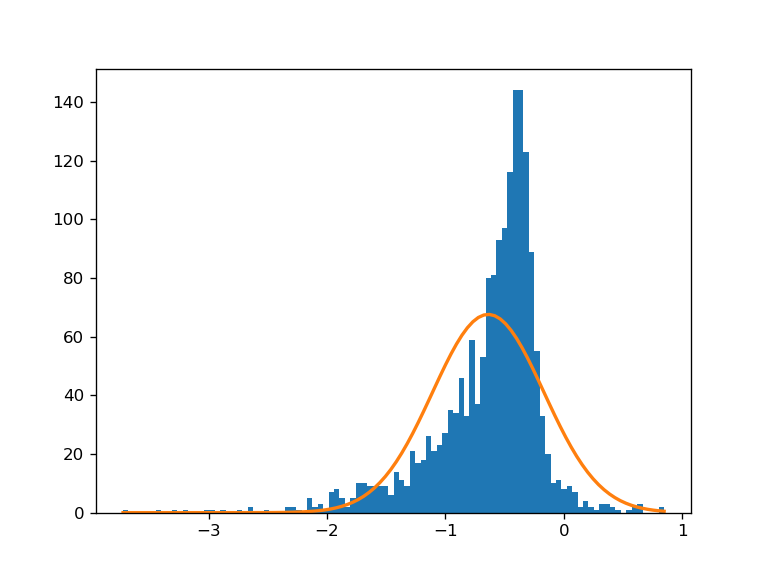(histogram_log2FC.png "Title")



##### 5. Quelles remarques peut-on faire à l'observation de l'histogramme et de loi théorique?

Ratio d'abondance : nombre de protéine dans condition expérimentale sur celui dans la condition de contrôle. Le milieu riche est la condition de contrôle. La tétracycline interrompt la traduction, c'est donc normal d'avoir moins de protéines dans la condition avec tétracycline.

La loi théorique suit assez bien la courbe. Leur maximum est décalé car après le pic, la nombre de ratios chute brusquement avant 0, alors qu'il augmentait doucement entre -2 et -0.5.

#### Construction d'un volcano plot

##### A l'aide de la méthode [scatter](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.scatter.html) representer <img src="https://render.githubusercontent.com/render/math?math=-\text{Log}_{10}({\text{p-value}}) = f(\text{Log}_2(\text{abundance ratio}))">

##### Matérialisez le quadran des protéines surabondantes, par deux droites ou un rectangle
Sont condidérées comme surabondantes les proteines remplissant ces deux critères:

* <img src="https://render.githubusercontent.com/render/math?math=\text{Log}_2(\text{abundance ratio})\gt\mu%2B\sigma">  
* <img src="https://render.githubusercontent.com/render/math?math=\text{p-value}>0.001">

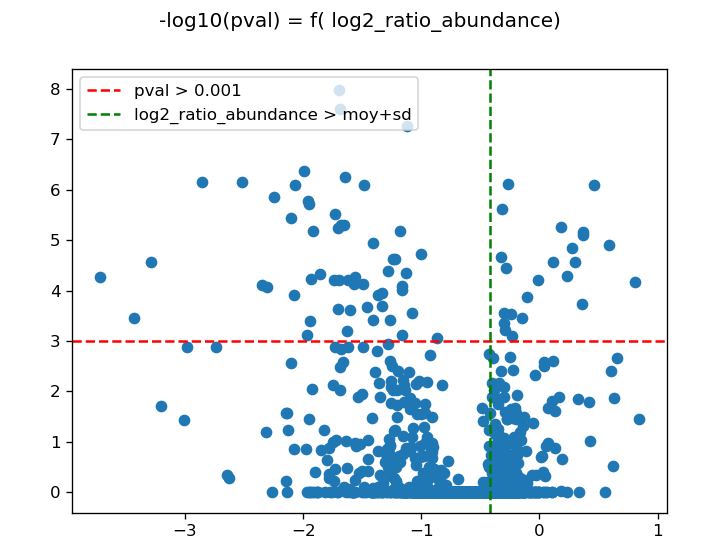

### Analyse Fonctionelle de pathway

Nous allons implementer une approche ORA (Over Representation Analysis) naive.

##### 1. Retrouver les entrées du fichier TSV des protéines surabondates

Quelles sont leurs identifiants UNIPROT ?
``` 



```

#### 2. Lister les termes GO portés par ces protéines surabondates

Les `entry` du fichier `data/uniprot-proteome_UP000000625.xml` présentent des balises de ce type:

```xml
<dbReference type="GO" id="GO:0005737">
<property type="term" value="C:cytoplasm"/>
<property type="evidence" value="ECO:0000501"/>
<property type="project" value="UniProtKB-SubCell"/>
</dbReference>
```

A ce stade, on se contentera des identifiants GO (eg `GO:0005737`). Vous pouvez faire un [set](https://docs.python.org/3.8/library/stdtypes.html#set) de cette liste d'identifiants GO pour en éliminer rapidement la redondance.

#### 3. Obtention des paramètres du modèle

Nous evaluerons la significativité de la présence de tous les termes GO portés par les protéines surabondantes à l'aide d'un modèle hypergéometrique.

Si k protéines surabondantes porte un terme GO, la pvalue de ce terme sera équivalente à <img src="https://render.githubusercontent.com/render/math?math=P(X\ge k), X \sim H(k,K,n,N)">.
Completer le tableau ci-dessous avec les quantités vous  semblant adéquates

| Symbole | Paramètre | Quantités Biologique |
| --- | --- | --- |
| k | nombre de succès observés| |
| K | nombre de succès possibles| |
| n | nombre d'observations| |
| N | nombre d'elements observables| |

#### 4. Calcul de l'enrichissement en fonction biologiques

A l'aide du contenu de `data/EColiK12_GOcounts.json` parametrez la loi hypergeometrique et calculez la pvalue
de chaque terme GO portés par les protéines surabondantes. Vous reportez ces données dans le tableau ci-dessous

| identifiant GO | définition | occurence | pvalue|
|---|---|---|---|
|   |   |   |   |

Quelle interpretation biologique faites-vous de cet enrichissement en termes GO spécifiques ?

```




```
